## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data, mimic_data = None)

/home/dwalke/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [3]:
ed_data = data[data["Sender"] == "ED"]
data_analysis_ed = DataAnalysis(ed_data)
y_test_ed = data_analysis_ed.get_y_test()
y_test_ed_gw = data_analysis_ed.get_y_gw()
X_test_ed = data_analysis_ed.get_X_test()
X_test_ed_gw = data_analysis_ed.get_X_gw()

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [3]:
y_train = data_analysis.get_y_train()
X_train = data_analysis.get_X_train()

y_test = data_analysis.get_y_test()
X_test = data_analysis.get_X_test()

y_gw_test = data_analysis.get_y_gw()
X_gw_test = data_analysis.get_X_gw()

## Metrics definition

In [7]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)
evaluation_ed = Evaluation(y_test_ed, y_test_ed_gw, X_test_ed, X_test_ed_gw)

## Logistic regression

8.05679440498352
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044219  0.776133  0.441226   0.008632  0.836916  0.009453
1  Greifswald  0.022229  0.592021  0.373617   0.003746  0.755808  0.004283


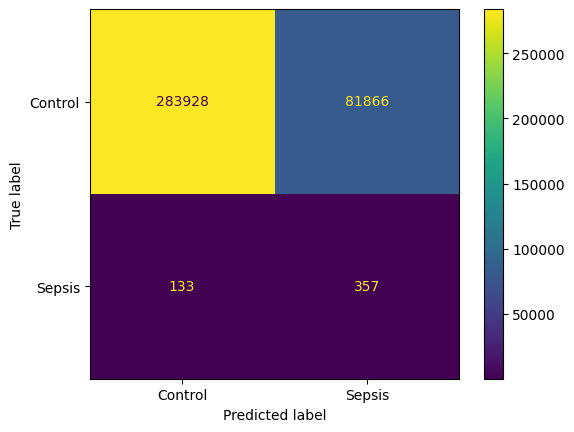

In [8]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(logistic_regression))
print(evaluation_ed.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

## Decision Tree

2.1091628074645996
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044252  0.726204  0.424541   0.007894  0.849454  0.009056
1  Greifswald  0.027364  0.631928  0.389278   0.004322  0.787637  0.003666


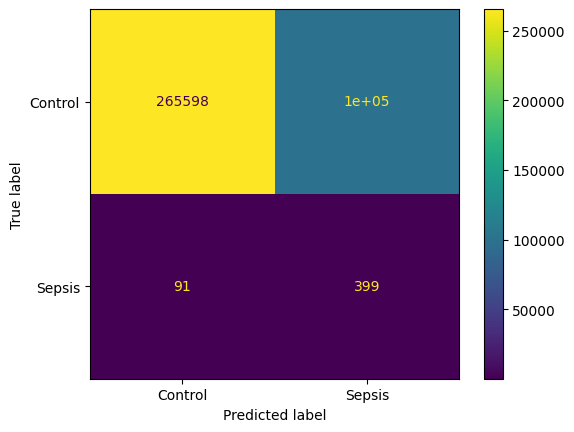

In [7]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(decision_tree))
print(evaluation_ed.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

## Random Forest

21.792006254196167
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.060686  0.884401  0.476675   0.014752  0.870462  0.017155
1  Greifswald  0.038800  0.841101  0.460667   0.007698  0.818016  0.005705
[0.1252504  0.01394143 0.05926164 0.53400178 0.07298815 0.05207995
 0.14247665]


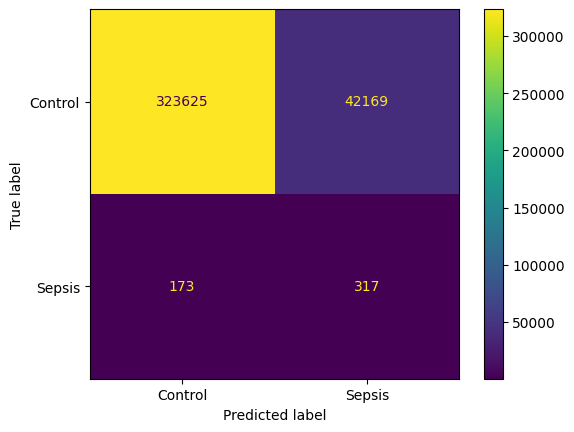

In [8]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
print(evaluation_ed.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## XG Boost

1.120248794555664
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.078705  0.980769  0.515829   0.041372  0.875481  0.018280
1  Greifswald  0.039413  0.959589  0.496704   0.014035  0.808292  0.006737


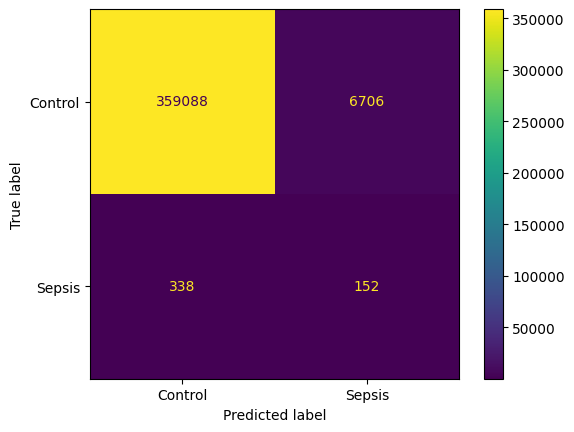

In [9]:
from xgboost import XGBClassifier
import time
start = time.time()

xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
print(evaluation_ed.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:267: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


229.92461347579956
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.056904  0.864288  0.470080   0.013025  0.867951  0.016951
1  Greifswald  0.035836  0.806673  0.449801   0.006685  0.815194  0.006096


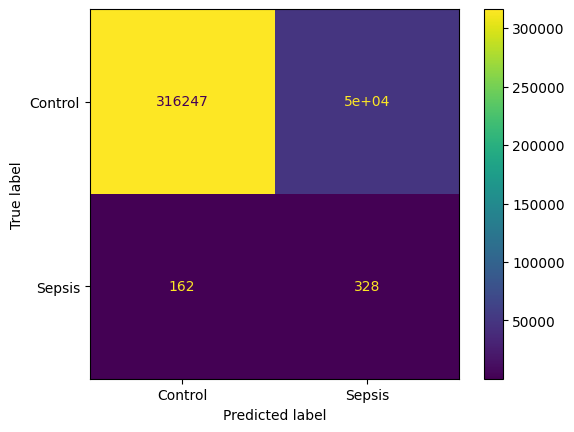

In [37]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
print(evaluation_ed.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)